In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

In [55]:
train_df = pd.read_csv('data/nCoV_100k_train.labled.csv',engine ='python')
test_df  = pd.read_csv('data/nCov_10k_test.csv',engine ='python')

In [8]:
temp = 'abcd'


AttributeError: 'str' object has no attribute 'map'

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
微博id      100000 non-null int64
微博发布时间    100000 non-null object
发布人账号     100000 non-null object
微博中文内容    99646 non-null object
微博图片      100000 non-null object
微博视频      100000 non-null object
情感倾向      99919 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
微博id      10000 non-null int64
微博发布时间    10000 non-null object
发布人账号     10000 non-null object
微博中文内容    9963 non-null object
微博图片      10000 non-null object
微博视频      10000 non-null object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [56]:
train_df = train_df[train_df['微博中文内容'].notna()]

Text(0.5, 1.0, 'sentiment(target)')

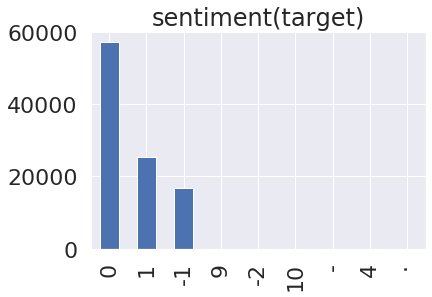

In [8]:
train_df['情感倾向'].value_counts().plot.bar()
plt.title('sentiment(target)')

In [57]:
train_df = train_df[train_df['情感倾向'].isin(['0','1','-1'])]

Text(0.5, 1.0, 'sentiment(target)')

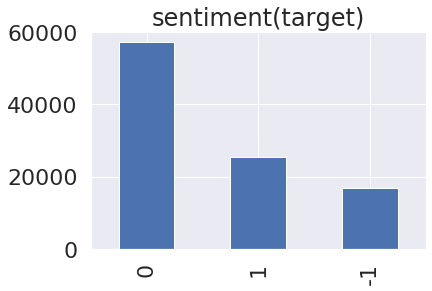

In [10]:
train_df['情感倾向'].value_counts().plot.bar()
plt.title('sentiment(target)')

In [58]:
test_df['微博中文内容'].fillna(' ',inplace= True)

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
微博id      10000 non-null int64
微博发布时间    10000 non-null object
发布人账号     10000 non-null object
微博中文内容    10000 non-null object
微博图片      10000 non-null object
微博视频      10000 non-null object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [40]:
train_df.to_csv('data/train_weibo_clean.csv')
test_df.to_csv('data/test_weibo_clean.csv')

In [67]:
train_df['微博中文内容'] = train_df['微博中文内容'].apply(str).apply(list)

In [68]:
train_df['微博中文内容']

0        [写, 在, 年, 末, 冬, 初, 孩, 子, 流, 感, 的, 第, 五, 天, ，, ...
1        [开, 年, 大, 模, 型, …, 累, 到, 以, 为, 自, 己, 发, 烧, 了, ...
2        [, 邱, 晨, 这, 就, 是, 我, 爹, ，, 爹, ，, 发, 烧, 快, 好, ...
3        [新, 年, 的, 第, 一, 天, 感, 冒, 又, 发, 烧, 的, 也, 太, 衰, ...
4        [问, ：, 我, 们, 意, 念, 里, 有, 坏, 的, 想, 法, 了, ，, 天, ...
                               ...                        
99995    [#, 抗, 击, 新, 型, 肺, 炎, 第, 一, 线, #, 【, @, 中, 国, ...
99996    [1, 、, 类, R, a, T, G, 1, 3, 病, 毒, （, 一, 种, 从, ...
99997    [#, 微, 博, 辟, 谣, #, 没, 有, 证, 据, 表, 明, ，, 吃, 大, ...
99998    [【, 新, 冠, 疫, 情, 最, 受, 关, 注, 的, 十, 一, 篇, 英, 文, ...
99999    [从, 蝙, 蝠, 携, 带, 的, 冠, 状, 病, 毒, 变, 异, 成, 2, 0, ...
Name: 微博中文内容, Length: 99560, dtype: object

In [69]:
content = train_df['微博中文内容'][3]
content

['新',
 '年',
 '的',
 '第',
 '一',
 '天',
 '感',
 '冒',
 '又',
 '发',
 '烧',
 '的',
 '也',
 '太',
 '衰',
 '了',
 '但',
 '是',
 '我',
 '要',
 '想',
 '着',
 '明',
 '天',
 '一',
 '定',
 '会',
 '好',
 '的',
 '?']

In [70]:
content[2] = 1

In [71]:
train_df['微博中文内容'][3]

['新',
 '年',
 1,
 '第',
 '一',
 '天',
 '感',
 '冒',
 '又',
 '发',
 '烧',
 '的',
 '也',
 '太',
 '衰',
 '了',
 '但',
 '是',
 '我',
 '要',
 '想',
 '着',
 '明',
 '天',
 '一',
 '定',
 '会',
 '好',
 '的',
 '?']

In [54]:
def f(x):
    #print(x)
    return list(x)

train_df['微博中文内容'].apply(f)
tiran_df['微博中文内容']

TypeError: 'float' object is not iterable

In [18]:
import pickle
import numpy as np

UNKNOWN = '<UNK>'
PADDING = '<PAD>'

def read_pretrain_embedding(emb_path):
    pre_train_emd = {}
    with open(emb_path, mode='r', encoding='utf-8') as f:
        word_nums, dim = f.readline().split()
        word_nums = int(word_nums)
        dim = int(dim)
        for line in f:
            tokens = line.strip().split(' ')
            if len(tokens) == dim + 1:
                pre_train_emd[tokens[0]] = list(map(lambda x: float(x), tokens[1:]))
    return pre_train_emd


In [19]:
pre_train_emd = read_pretrain_embedding('data/sgns.weibo.char')

In [20]:
import csv
def read_data(dataPath, is_train = True):
    with open(dataPath, mode='r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        data = list(reader)
        data = np.asarray(data)
        content_data = {'content':[], 'label':[]}
        for line in data:
            content_data['content'].append(list(line['微博中文内容']))
            if is_train:
                content_data['label'].append(line['情感倾向'])
        
        return content_data
    

In [9]:
content_train_data = read_data('data/train_weibo_clean.csv')
content_test_data = read_data('data/test_weibo_clean.csv', False)

NameError: name 'read_data' is not defined

In [22]:
len(content_train_data['content'])

99560

In [ ]:
content_data = content_train_data

In [23]:
def build_word_emb(content_train_data, pre_train_emd, emd_dim, content_test_data = None):
    """
        return word_emb type-list [n_vocab * dim]
               word2Index type-dict {word: index}
    """
    word_emb = [np.random.uniform(-0.1, 0.1, emd_dim) for _ in range(2)]
    word2Index = {PADDING: 0, UNKNOWN: 1}
    for content in content_train_data['content']:
        for i in range(len(content)):
            if content[i] not in word2Index:
                if content[i] in pre_train_emd: # in vocab
                    word2Index[content[i]] = len(word2Index)
                    word_emb.append(pre_train_emd[content[i]])
                else: # not in vocab
                    content[i] = UNKNOWN
            content[i] = word2Index[content[i]]
            
    if content_test_data is not None:
        for content in content_test_data['content']:
            for i in range(len(content)):
                if content[i] not in word2Index:
                    if content[i] in pre_train_emd: # in vocab
                        word2Index[content[i]] = len(word2Index)
                        word_emb.append(pre_train_emd[content[i]])
                    else: # not in vocab
                        content[i] = UNKNOWN
                content[i] = word2Index[content[i]]
    word_emb = np.asarray(word_emb, dtype='float32')
    return word_emb, word2Index
                    

In [24]:
def save_word_emb(word_emb, word2Index):
    with open('data/word_emb', 'wb') as f:
        pickle.dump((word_emb, word2Index), f)
    print('saved.')

def load_word_emb(path):
    with open(path, 'rb') as f:
        word_emb, word2Index = pickle.load(f)
        return word_emb, word2Index

In [25]:
word_emb, word2Index = build_word_emb(content_train_data, pre_train_emd, 300, content_test_data)
#save_word_emb(word_emb, word2Index)

In [26]:
save_word_emb(word_emb, word2Index)

saved.


In [27]:
word_emb, word2Index = load_word_emb('data/word_emb')

In [40]:
word_emb.shape

(5224, 300)

In [29]:
def pad_content(content_data, seq_len):
    pad_seq = np.zeros((len(content_data), seq_len), dtype=int)
    for i, row in enumerate(content_data):
        doc_len = seq_len
        if doc_len > len(row):
            doc_len = len(row)
        pad_seq[i, :doc_len] = row[:doc_len]
    return pad_seq

In [30]:
seq_len = 140

train_content = pad_content(content_train_data['content'], seq_len)


In [31]:
test_content = pad_content(content_test_data['content'], seq_len)

In [32]:
content_train_data['content'] = train_content

In [117]:
def split_data(content_train_data):
    np.random.seed(123)
    #np.random.shuffle(content_train_data['content'])
    #np.random.shuffle(content_train_data['label'])
    length = len(content_train_data['content'])
    train_x = content_train_data['content'][:int(0.9 * length)]
    train_y = content_train_data['label'][:int(0.9 * length)]
    valid_x = content_train_data['content'][int(0.9 * length):]
    valid_y = content_train_data['label'][int(0.9 * length):]
    train_y = np.asarray(train_y, dtype='int')
    valid_y = np.asarray(valid_y, dtype='int')
    return train_x, train_y, valid_x, valid_y

In [118]:
train_x, train_y, valid_x, valid_y = split_data(content_train_data)

In [119]:
train_y = train_y + 1 # 0 neg 1 mid 2 positive


In [120]:
valid_y = valid_y + 1

In [121]:
valid_y

array([1, 1, 1, ..., 1, 2, 1])

In [122]:
batch_size = 16

import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))

In [123]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [124]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
 
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)


Sample input size:  torch.Size([16, 140])
Sample input: 
 tensor([[ 118,  624,   11,  ...,   94,   95,   70],
        [ 229,   15,   16,  ...,   98,    0,    0],
        [ 118, 1417, 1157,  ..., 1028,   52,  101],
        ...,
        [  13,   32, 1378,  ...,  369,   16, 1243],
        [ 474,  442,  442,  ...,    0,    0,    0],
        [ 442,  442,  162,  ...,    0,    0,    0]])

Sample label size:  torch.Size([16])
Sample label: 
 tensor([2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1])


In [139]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()
 
if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')


No GPU available, training on CPU.


## 模型

In [142]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class STModel(nn.Module):
    
    def __init__(self, emd_dim, batch_size, vocab_size, classes_num, hidden_num, layer_num, embeddings = None, padding_idx = 0,dropout=0.5):
        super(STModel, self).__init__()
        self.hidden_num = hidden_num
        self.batch_size = batch_size
        self.layer_num = layer_num
        self.dropout = dropout
        self.vocab_size = vocab_size
        self.emd_dim = emd_dim
        self.encoder = nn.Embedding(vocab_size, emd_dim, padding_idx= padding_idx)
        if embeddings is not None:
            self.encoder.weight.data.copy_(embeddings)
        self.drop = nn.Dropout(dropout)
        self.lstm = nn.LSTM(emd_dim, hidden_num, layer_num, dropout= dropout,
                            bidirectional= False,batch_first = True)
        self.fc = nn.Linear(hidden_num, classes_num)
        self.init_weights()
        self.sigm = nn.Sigmoid()
        
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        #print(batch_size)
        emb = self.drop(self.encoder(x))
        #print('emb', emb.size())
        lstm_out, hidden = self.lstm(emb, hidden)
        #print('lstm_out', lstm_out.size())
        lstm_out = self.drop(lstm_out) #lstm_out torch.Size([16, 140, 100]) batch seq hidden 
        lstm_out = lstm_out.transpose(0, 1)#lstm_out torch.Size([140, 16, 100]) seq batch hidden 
        fc_input = lstm_out[-1]
        #print('fc_input', fc_input.size())
        fc_out = self.fc(fc_input)
        #print('fc_out', fc_out.size())
        sig_out = self.sigm(fc_out)
        #print('sig_out', sig_out.size())
        pred = sig_out.view(batch_size, -1)
        return sig_out
    
    def print_shape(name, shape):
        print('name:', shape)
        
    def init_weights(self):
        initrange = 0.1
        #self.encoder.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
        self.fc.weight.data.uniform_(-initrange, initrange)
        
    def init_hidden(self, batch_size):
        weight = next(self.parameters())
        if(train_on_gpu):
            return (weight.new_zeros(self.layer_num, batch_size, self.hidden_num).cuda(),
                    weight.new_zeros(self.layer_num, batch_size, self.hidden_num).cuda())
        else:
            return (weight.new_zeros(self.layer_num, batch_size, self.hidden_num),
                    weight.new_zeros(self.layer_num, batch_size, self.hidden_num))

## Train

In [134]:
emd_dim = 300
vocab_size = word_emb.shape[0]
classes_num = 3
hidden_num = 100
layer_num = 2
dropout = 0.5
#embeddings = torch.tensor(pickle.load(pkl), dtype=torch.float).to(device)
word_emb = torch.tensor(word_emb, dtype=torch.float,requires_grad=False)
model = STModel(emd_dim, batch_size, vocab_size, classes_num, hidden_num, layer_num, embeddings = word_emb, dropout = 0.5)

/home/leslie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [135]:
import torch.optim as optim

SAVE_PATH = 'STMmodel.pt'
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
batch_size = 16
clip = 5
epochs = 5

In [137]:
for epoch in range(epochs):
    running_loss = 0.0
    batch_count = 0
    for i, train_data in enumerate(train_loader):
        print('batch_index:', i)
        train_input, train_laebl = train_data
        if(train_on_gpu):
            train_input, train_laebl = train_input.cuda(), train_laebl.cuda()
        # forward
        hidden = model.init_hidden(batch_size) # 有问题
        model.zero_grad()
        outputs = model(train_input, hidden)
        loss = criterion(outputs, train_laebl)
        # backward
        loss.backward()
        # optimize
        optimizer.step()
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            val_h = model.init_hidden(batch_size)
            evaluate_model(valid_loader,model)
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            torch.save(net.state_dict(), PATH)
            with open(SAVE_PATH, 'wb') as f:
                torch.save(model, f)
print('finished training')

batch_index: 0
batch_index: 1
batch_index: 2
batch_index: 3
batch_index: 4
batch_index: 5
batch_index: 6
batch_index: 7
batch_index: 8
batch_index: 9
batch_index: 10
batch_index: 11
batch_index: 12
batch_index: 13
batch_index: 14
batch_index: 15
batch_index: 16
batch_index: 17
batch_index: 18
batch_index: 19
batch_index: 20
batch_index: 21
batch_index: 22
batch_index: 23
batch_index: 24
batch_index: 25
batch_index: 26
batch_index: 27
batch_index: 28
batch_index: 29
batch_index: 30
batch_index: 31
batch_index: 32
batch_index: 33
batch_index: 34
batch_index: 35
batch_index: 36
batch_index: 37
batch_index: 38
batch_index: 39
batch_index: 40
batch_index: 41
batch_index: 42
batch_index: 43
batch_index: 44
batch_index: 45
batch_index: 46
batch_index: 47
batch_index: 48
batch_index: 49
batch_index: 50
batch_index: 51
batch_index: 52
batch_index: 53
batch_index: 54
batch_index: 55
batch_index: 56
batch_index: 57
batch_index: 58
batch_index: 59
batch_index: 60
batch_index: 61
batch_index: 62
ba

batch_index: 489
batch_index: 490
batch_index: 491
batch_index: 492
batch_index: 493
batch_index: 494
batch_index: 495
batch_index: 496
batch_index: 497
batch_index: 498
batch_index: 499


TypeError: evaluate_model() takes 1 positional argument but 2 were given

In [138]:
def evaluate_model(data_loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            train_input, labels = data
            if(train_on_gpu):
                rain_input, labels = rain_input.cuda(), labels.cuda()
            outputs = model(train_input)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network: %d %%' % (
    100 * correct / total))

In [ ]:
def predict_model(data_loader):
    correct = 0
    total = 0
    pred = []
    with torch.no_grad():
        for data in data_loader:
            train_input = data
            outputs = net(train_input)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network: %d %%' % (
    100 * correct / total))